## Customer Segmentation for Online Retail store

We endeavour to find the various customer segments using the online retail store's transaction data obtained.  This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for each Country wise and registered non-store online retail.

### The need of customer segmentation:   
The differences in customers' behaviour, demographics, geographies, etc. help in classifying them in groups. Learning about different groups in the customer can help with following:    

1. Target Marketing    
2. Client understanding
3. Optimal product placement
4. Searching for new customers
5. Revenue growth
6. Loyalty of Customer


### Recency-Frequency-Monetary (RFM)  Analysis to determine customer value:    

The RFM model is quite useful model in retail customer segmentation where only the data of customer transaction is available. RFM stands for the three dimensions:

 - *Recency* – How recently did the customer purchase?
 - *Frequency* – How often do they purchase?
 - *Monetary Value* – How much do they spend?    
 

A combination of these three attributes can be defined to assign a quantitative value to customers. e.g. A customer who recently bought high value products and transacts regularly is a high value customer. 

### Problem Statement : Analysis of the Loyalty of each customers towards their purchase online
with recent and frequent purchase in product by customer in online we will determine how loyal the customer is.

### Import required packages

In [60]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the csv dataset with pandas

In [61]:
#Import Online Retail Data containing transactions from 01/12/2010 and 09/12/2011
Rtl_data = pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [62]:
#Check the shape (number of columns and rows) in the dataset
Rtl_data.shape

(541909, 8)

In [63]:
Rtl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Plot countrywise oreder details

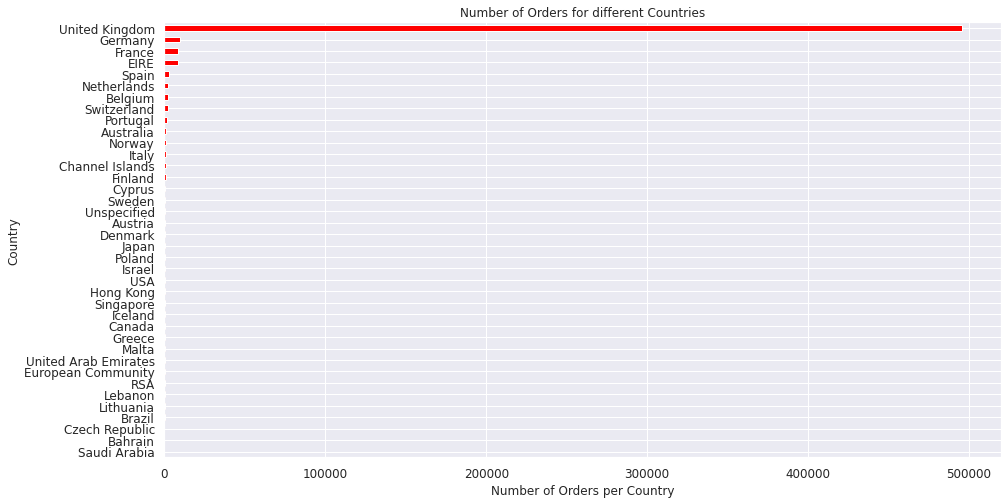

In [64]:

%matplotlib inline

group_country_orders = Rtl_data.groupby('Country')['InvoiceDate'].count().sort_values()

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
group_country_orders.plot.barh(fontsize=12, color="red")
plt.xlabel('Number of Orders per Country', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

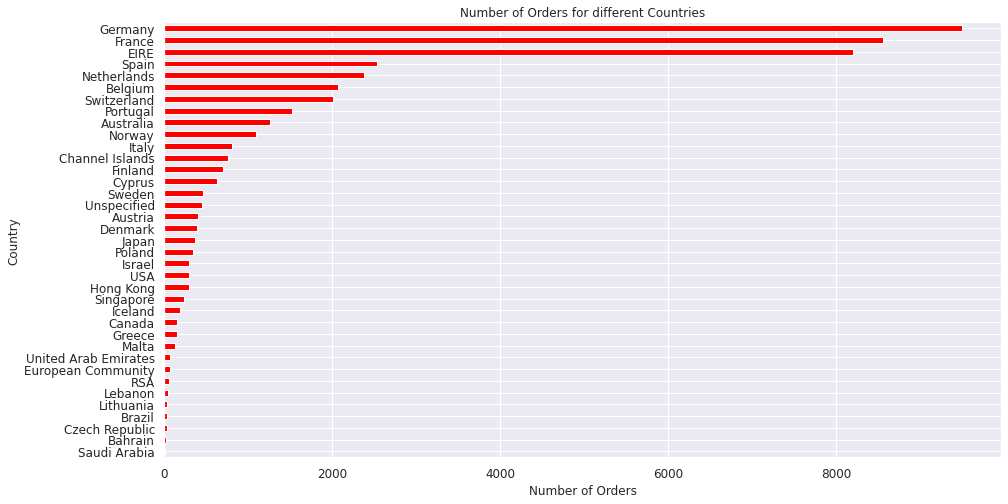

In [65]:
# Excluding UK now

group_country_orders = Rtl_data.groupby('Country')['InvoiceDate'].count().sort_values()
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders_without_uk.plot.barh(fontsize=12, color="red")
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

### Distribuion of the customers from each country

In [66]:
#Customer distribution by country
country_cust_data=Rtl_data[['Country','CustomerID']].drop_duplicates()
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [67]:
#read from any country eg: Germany
Rtl_data = Rtl_data.query("Country=='Germany'").reset_index(drop=True)

### Check for missing values in the dataset

In [68]:
#Check for missing values in the dataset
Rtl_data.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### As above missing value check we see that the CustomerID and Description column has too much null values we can ignore them

In [69]:
#Remove missing values from CustomerID column, can ignore missing values in description column
Rtl_data = Rtl_data[pd.notnull(Rtl_data['CustomerID'])]

#Validate if there are any negative values in Quantity column
Rtl_data.Quantity.min()

-288

In [70]:
#Validate if there are any negative values in UnitPrice column
Rtl_data.UnitPrice.min()

0.0

In [71]:
#Filter out records with negative values
Rtl_data = Rtl_data[(Rtl_data['Quantity']>0)]

In [72]:
#Convert the string date field to datetime
Rtl_data['InvoiceDate'] = pd.to_datetime(Rtl_data['InvoiceDate'])

In [73]:
#Add new column depicting total amount
Rtl_data['TotalAmount'] = Rtl_data['Quantity'] * Rtl_data['UnitPrice']

In [74]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
Rtl_data.shape

(9042, 9)

In [75]:
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany,17.7
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany,15.3
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany,10.2
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany,19.8
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany,23.4


In [76]:
# Get our date range for our data
print('Date Range: %s to %s' % (Rtl_data['InvoiceDate'].min(), Rtl_data['InvoiceDate'].max()))

# 

Date Range: 2010-12-01 13:04:00 to 2011-12-09 12:16:00


#### Since OurDate Range: 2010-12-01 13:04:00 to 2011-12-09 12:16:00 we're taking all of the transactions that occurred before December 09, 2011 

In [77]:
# Rtl_data = Rtl_data.loc[Rtl_data['InvoiceDate'] < '2011-12-01']

## RFM Analysis

In [78]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Analysis scores for each customer
RFMScores = Rtl_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'InvoiceDate_Recency', 
                         'InvoiceNo': 'InvoiceNo_Frequency', 
                         'TotalAmount': 'TotalAmount_Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,InvoiceDate_Recency,InvoiceNo_Frequency,TotalAmount_Monetary
0,12426.0,194,30,582.73
1,12427.0,21,31,825.80
2,12468.0,187,38,729.54
3,12471.0,2,460,19824.05
4,12472.0,32,339,6572.11


In [79]:
#Descriptive Statistics (InvoiceDate_Recency , InvoiceNo_Frequency, TotalAmount_Monetary)
RFMScores.describe()

,InvoiceDate_Recency,InvoiceNo_Frequency,TotalAmount_Monetary
count,94.000000,94.000000,94.000000
mean,77.117021,96.191489,2434.756809
std,91.382083,106.755905,3268.239206
min,0.000000,3.000000,63.000000
25%,16.250000,23.250000,530.150000
50%,30.500000,55.000000,1066.140000
75%,92.000000,141.250000,3328.692500
max,372.000000,467.000000,19824.050000


/home/srihari/anaconda3/envs/nmt/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


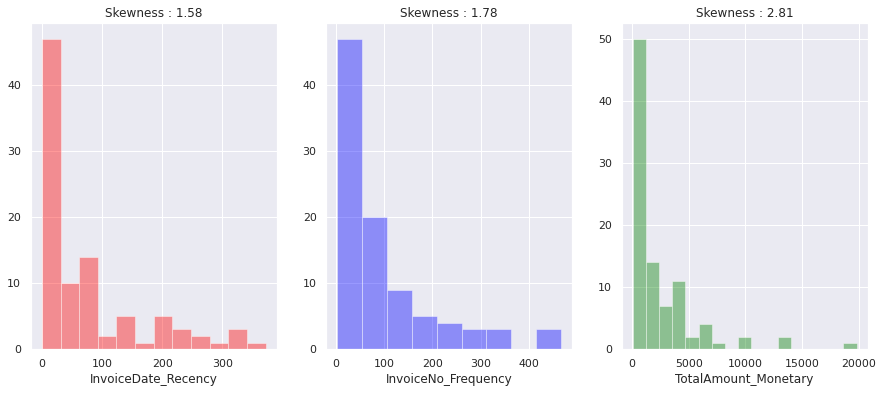

In [80]:
sns.set()

fig, ax = plt.subplots(1,3, figsize = (15,6))
for col, ax, color in zip(['InvoiceDate_Recency','InvoiceNo_Frequency','TotalAmount_Monetary'], ax, ['red','blue','green']):
    sns.distplot(RFMScores[col], ax = ax, color = color,kde=False).set_title('Skewness ' + ': ' + round(RFMScores[col].skew(),2).astype(str))

#### Observe that the features are highly skewed(right skewed)
##### Ref: Skew of data
https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37

## K-Means Clustering

In [81]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['InvoiceDate_Recency'] = [handle_neg_n_zero(x) for x in RFMScores.InvoiceDate_Recency]
RFMScores['TotalAmount_Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.TotalAmount_Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['InvoiceDate_Recency', 'InvoiceNo_Frequency', 'TotalAmount_Monetary']].apply(np.log, axis = 1).round(3)

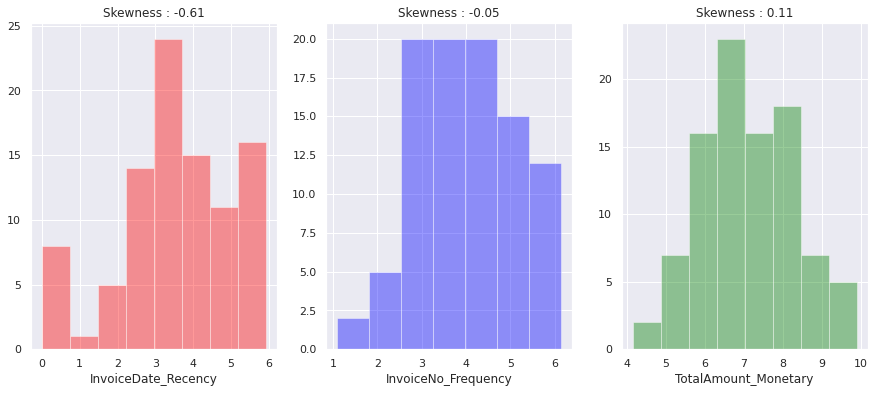

In [82]:
#Data distribution after data normalization for InvoiceDate_Recency,InvoiceNo_Frequency,TotalAmount_Monetary
# after transformation let us visualize the columns

fig, ax = plt.subplots(1,3, figsize = (15,6))
for col, ax, color in zip(['InvoiceDate_Recency','InvoiceNo_Frequency','TotalAmount_Monetary'], ax, ['red','blue','green']):
    sns.distplot(Log_Tfd_Data[col], ax = ax, color = color,kde=False).set_title('Skewness ' + ': ' + round(Log_Tfd_Data[col].skew(),2).astype(str))
    

In [83]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)
Scaled_Data.head()

,InvoiceDate_Recency,InvoiceNo_Frequency,TotalAmount_Monetary
CustomerID,,,
12426.0,1.174828,-0.540602,-0.615214
12427.0,-0.332179,-0.510774,-0.324992
12468.0,1.149745,-0.326380,-0.428404
12471.0,-1.926637,1.927012,2.326203
12472.0,-0.046776,1.651326,1.405499


### Finding K 

Text(0.5, 1.0, 'Elbow Techinque to find the optimal cluster size')

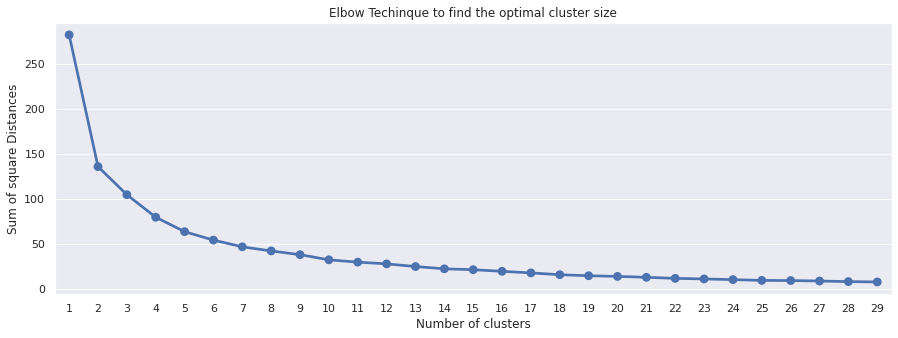

In [88]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,30):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 42)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize = (15,5))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square Distances")
plt.title("Elbow Techinque to find the optimal cluster size")

####  As per Elbow method we can observe that at k = 3 the sum of squares is plummented



In [89]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 42)
KMean_clust.fit(Scaled_Data)


#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,InvoiceDate_Recency,InvoiceNo_Frequency,TotalAmount_Monetary,Cluster
CustomerID,,,,
12426.0,194,30,582.73,1
12427.0,21,31,825.80,0
12468.0,187,38,729.54,1
12471.0,2,460,19824.05,2
12472.0,32,339,6572.11,2


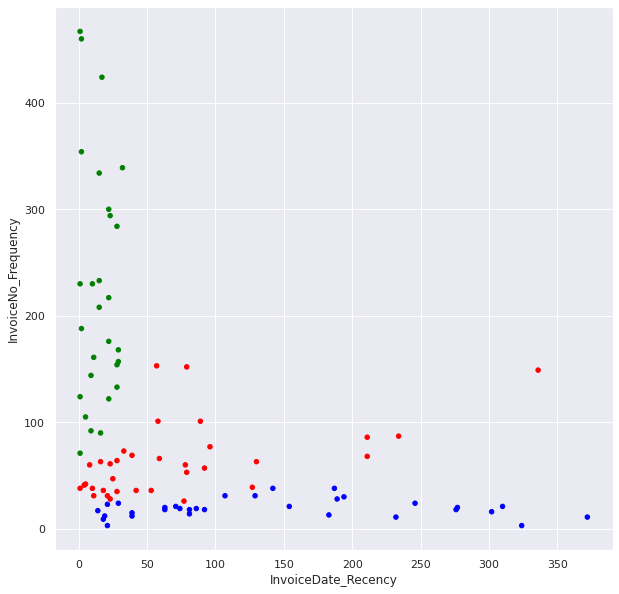

In [90]:
from matplotlib import pyplot as plt

##Scatter Plot Frequency Vs Recency
Colors = ["red", "blue", "green"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="InvoiceDate_Recency", y="InvoiceNo_Frequency",
    figsize=(10,10),
    c = RFMScores['Color']
)



##### Assign respective Status/members to the cluster afer predection

In [91]:
RFMScores['Status'] = 'Regular' 
RFMScores.loc[RFMScores['Color'] == "green", 'Status'] ='Gold'
RFMScores.loc[RFMScores['Color'] == "red", 'Status'] ='Silver'
RFMScores.loc[RFMScores['Color'] == "blue", 'Status'] ='Bronze'

In [40]:
RFMScores.head()

,InvoiceDate_Recency,InvoiceNo_Frequency,TotalAmount_Monetary,Cluster,Color,Status
CustomerID,,,,,,
12426.0,194,30,582.73,0,red,Bronze
12427.0,21,31,825.80,2,green,Silver
12468.0,187,38,729.54,0,red,Bronze
12471.0,2,460,19824.05,1,blue,Gold
12472.0,32,339,6572.11,1,blue,Gold


#### After Clustering is done visualize the recency, frequency, monetary with respect to Clusters

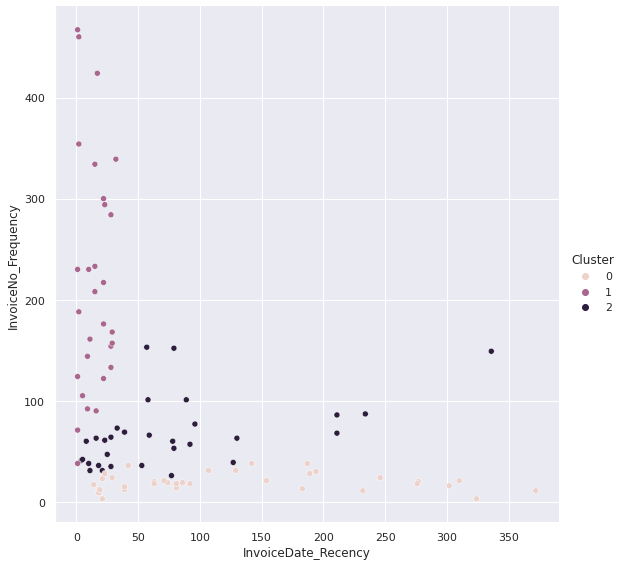

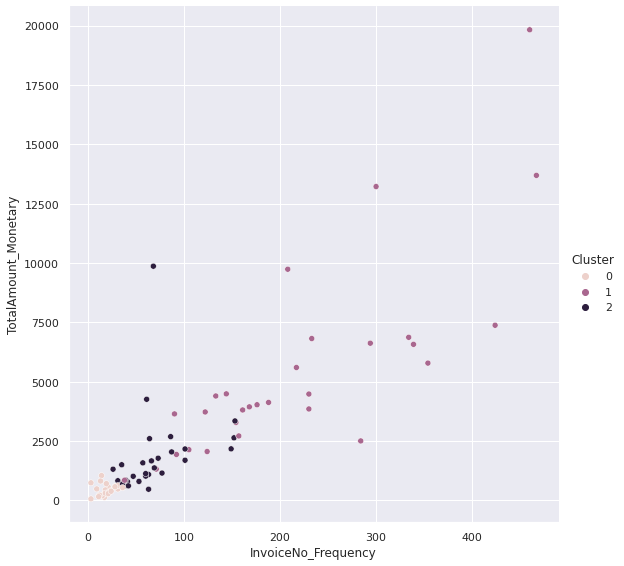

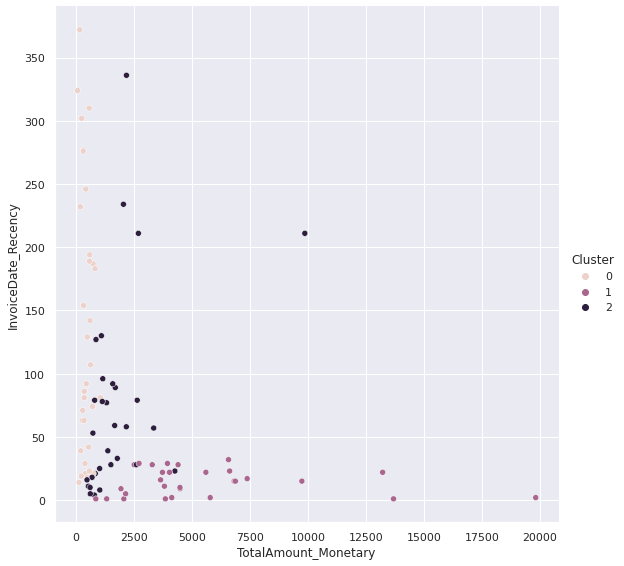

In [38]:
sns.pairplot(x_vars='InvoiceDate_Recency', y_vars='InvoiceNo_Frequency', hue = 'Cluster', data = RFMScores, height = 8)
sns.pairplot(x_vars='InvoiceNo_Frequency', y_vars='TotalAmount_Monetary', hue = 'Cluster', data = RFMScores, height = 8)
sns.pairplot(x_vars='TotalAmount_Monetary', y_vars='InvoiceDate_Recency', hue = 'Cluster', data = RFMScores, height = 8)

In [39]:
RFMScores

,InvoiceDate_Recency,InvoiceNo_Frequency,TotalAmount_Monetary,Cluster,Color,Status
CustomerID,,,,,,
12426.0,194,30,582.73,0,red,Bronze
12427.0,21,31,825.80,2,green,Silver
12468.0,187,38,729.54,0,red,Bronze
12471.0,2,460,19824.05,1,blue,Gold
12472.0,32,339,6572.11,1,blue,Gold
...,...,...,...,...,...,...
13814.0,92,57,1579.12,2,green,Silver
13815.0,22,176,4027.36,1,blue,Gold
13816.0,23,28,571.67,0,red,Bronze


In [35]:
RFMScores.max()

InvoiceDate_Recency          372
InvoiceNo_Frequency          467
TotalAmount_Monetary    19824.05
Cluster                        2
Color                        red
Prime_members             Silver
dtype: object